In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("./project/train.csv", index_col=0)
df.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [3]:
df_test = pd.read_csv("./project/test.csv", index_col=0)
columns = ['class'] + list(df.columns)[:-1]
df_full = pd.read_csv("./project/SUSY.csv", names=columns)
df_full = df_full[list(df.columns)]

df_full['JOIN'] = df_full['lepton_1_pT'].astype('str').apply(lambda x: x[:7]) + \
                    df_full['lepton_1_eta'].astype('str').apply(lambda x: x[:7]) + \
                        df_full['lepton_1_phi'].astype('str').apply(lambda x: x[:7])

df_test['JOIN'] = df_test['lepton_1_pT'].astype('str').apply(lambda x: x[:7]) + \
                    df_test['lepton_1_eta'].astype('str').apply(lambda x: x[:7]) + \
                        df_test['lepton_1_phi'].astype('str').apply(lambda x: x[:7])

df_all = df_full.merge(df_test, on=['JOIN'], how='left', indicator=True)

df_test = df_full.iloc[(df_all[df_all['_merge'] == 'both']).index].drop('JOIN', axis=1)

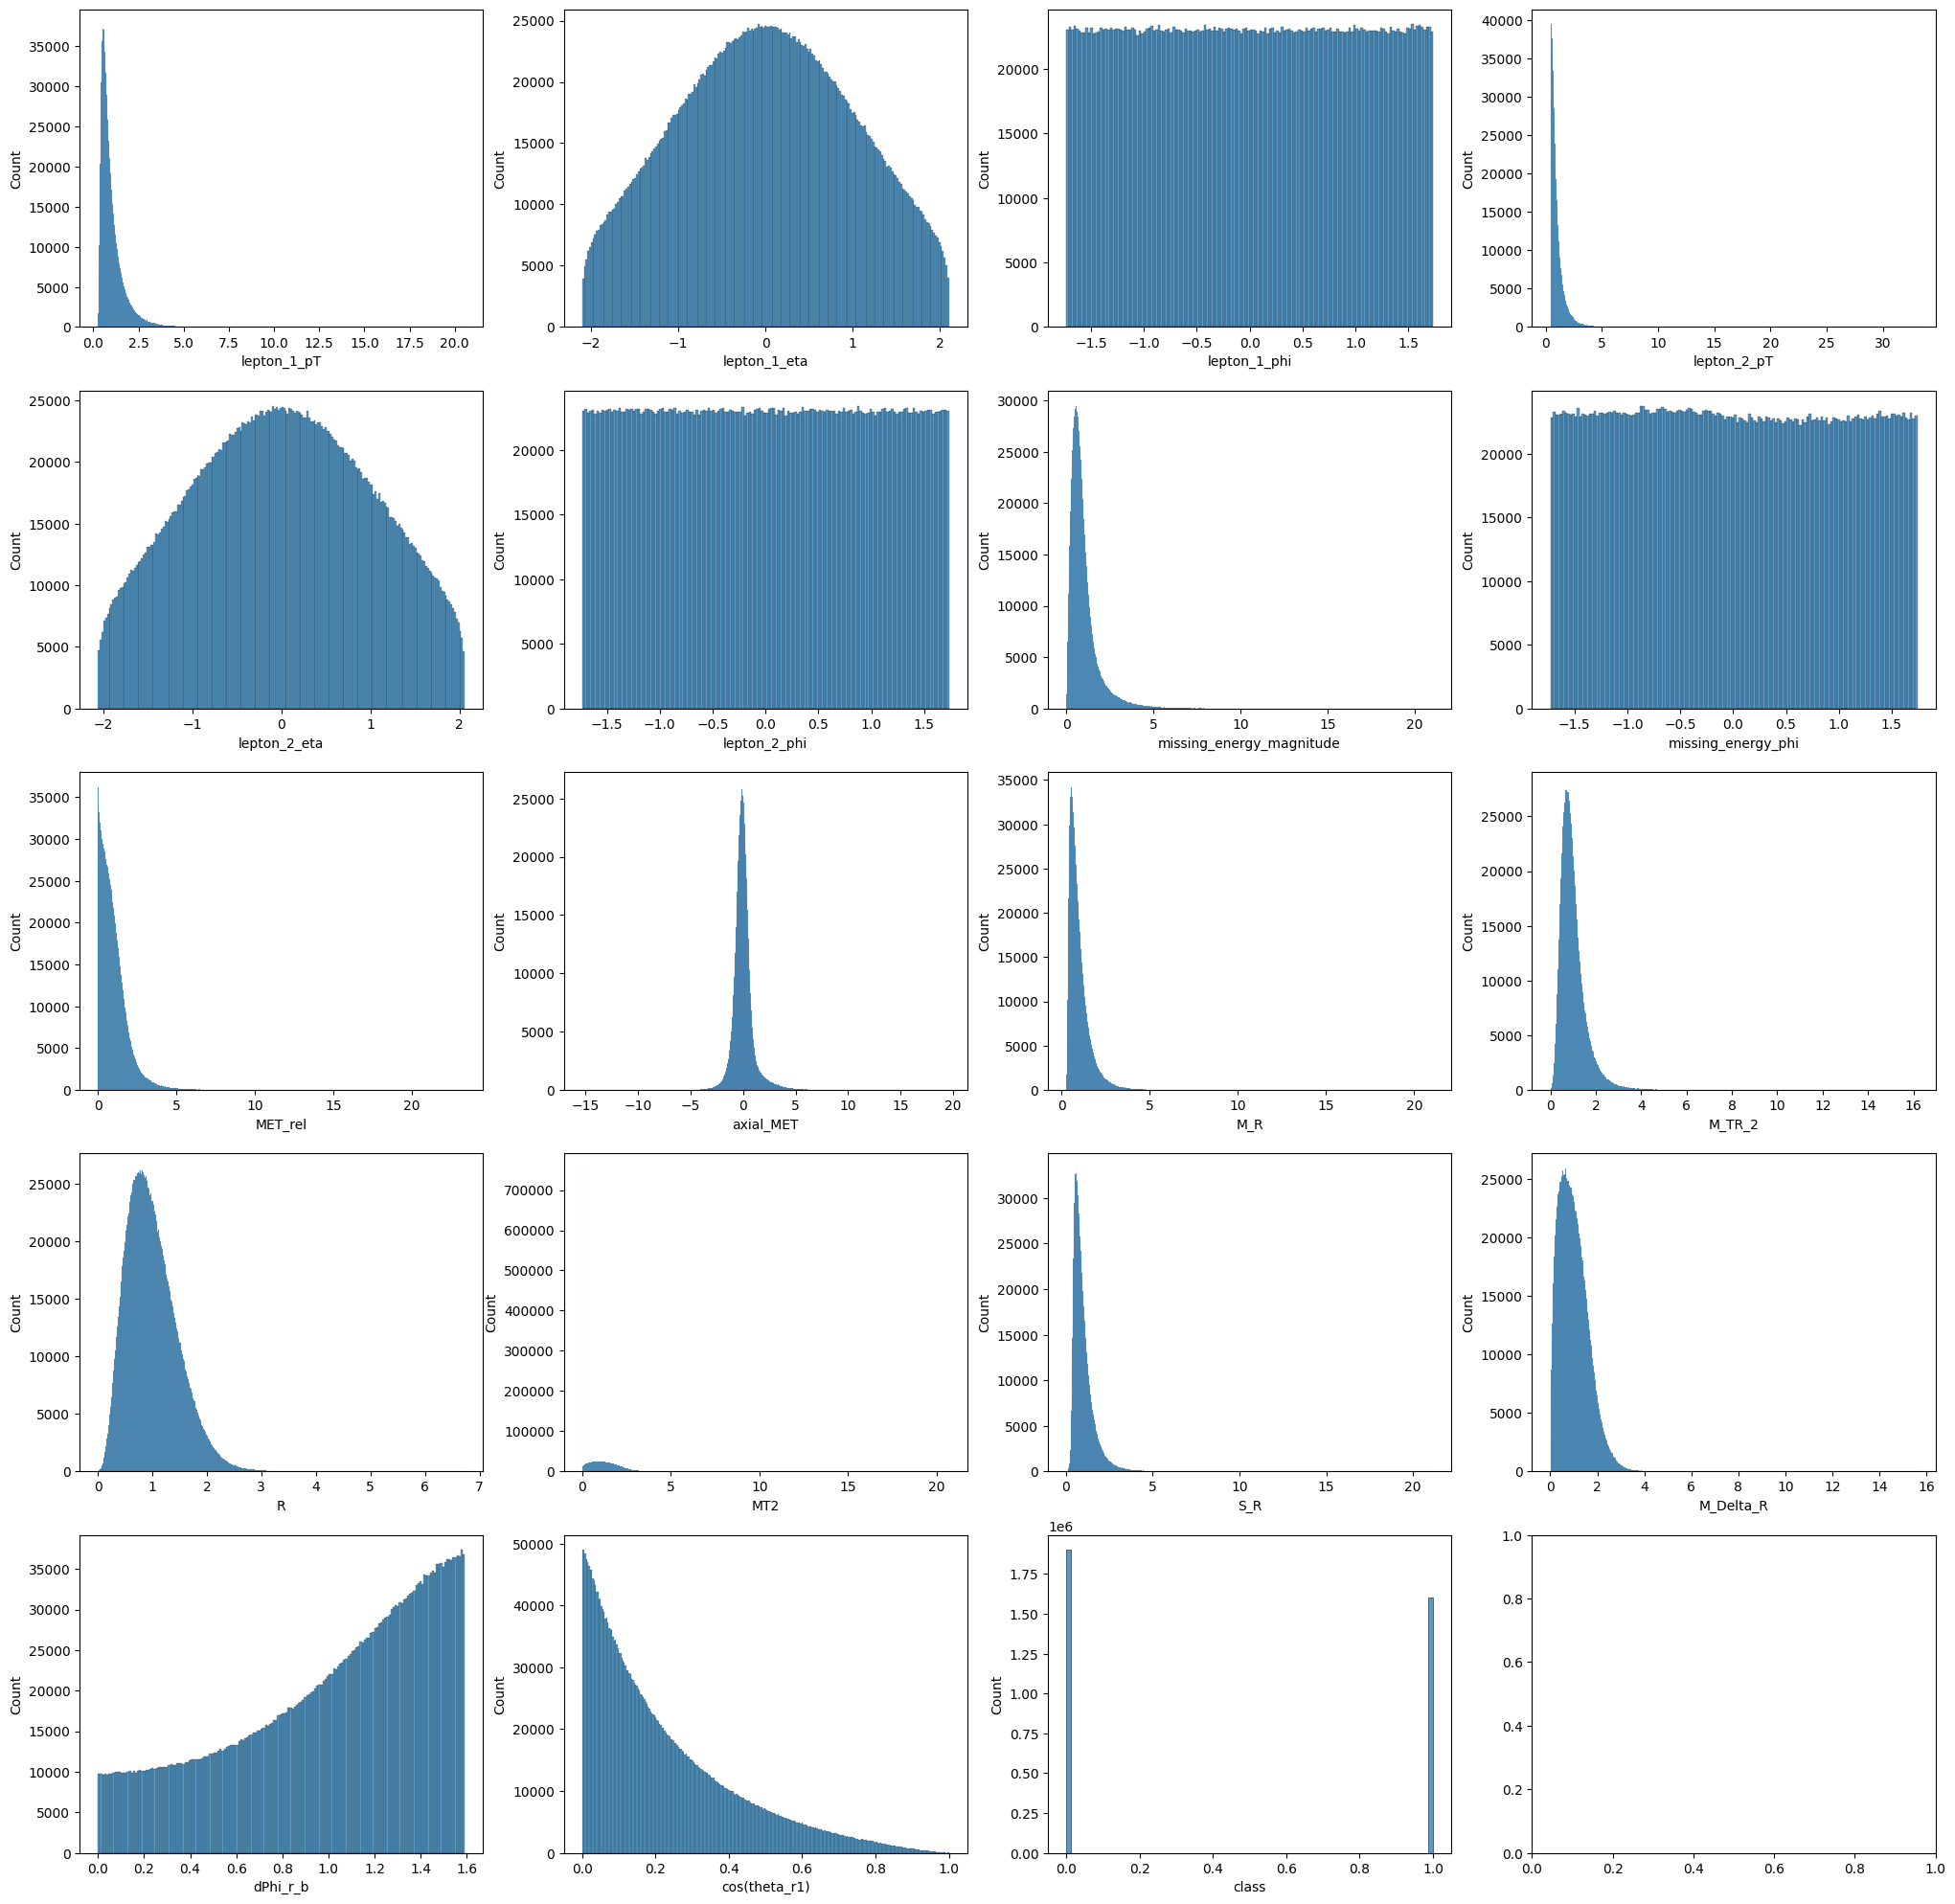

In [8]:
n_rows = 5
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25,25))

for i, column in enumerate(df.columns):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])

plt.show()

In [4]:
Y = df['class']
df_train = df.drop('class',axis=1)

YFinal = df_test['class']
XFinal = df_test.drop('class', axis=1)

from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import uniform

Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_train,Y,test_size=0.10,random_state=42,shuffle=True)

In [5]:
import pandas as pd
with open("/Users/syed/Downloads/Savyasachi Submission_16.csv", 'r') as f:
    f.readline()
    data =f.readlines()
aaysuh = pd.DataFrame([i.strip().split(',')[1] for i in data], dtype=float)

sum(aaysuh[0].values == df_test['class'].values)/1_500_000

0.8044893333333333

In [11]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(Xtrain,Ytrain)

print("Training Acc: ",classifier_XGB.score(Xtrain, Ytrain))

print("Val Acc: ",classifier_XGB.score(Xtest, Ytest))
print("Test Acc: ",classifier_XGB.score(XFinal, YFinal))

Training Acc:  0.8046225396825397
Val Acc:  0.8033114285714286
Test Acc:  0.80312


In [13]:
classifier_XGB = XGBClassifier(n_estimators=100)
classifier_XGB.fit(Xtrain,Ytrain)

print("Training Acc: ",classifier_XGB.score(Xtrain, Ytrain))

print("Val Acc: ",classifier_XGB.score(Xtest, Ytest))
print("Test Acc: ",classifier_XGB.score(XFinal, YFinal))

Training Acc:  0.8046225396825397
Val Acc:  0.8033114285714286
Test Acc:  0.80312


In [16]:
classifier_XGB = XGBClassifier(n_estimators=1000, n_jobs=-1)
classifier_XGB.fit(Xtrain,Ytrain)

print("Training Acc: ",classifier_XGB.score(Xtrain, Ytrain))

print("Val Acc: ",classifier_XGB.score(Xtest, Ytest))
print("Test Acc: ",classifier_XGB.score(XFinal, YFinal))

Training Acc:  0.8148161904761905
Val Acc:  0.8026771428571429
Test Acc:  0.802146


In [ ]:
def parameter_tuning(model, parameters, verbose = 2, train_X=Xtrain, train_Y=Ytrain, 
                test_X=Xtest, test_Y=Ytest):
    """
    This is used for doing the hyper parameter tuning.
    The model once trained, is than used to 
    """
    global ACCURACIES
    estimator = model(random_state = 42)

    num_combinations = 1
    for k,v in parameters.items():
        num_combinations *= len(v)
    num_combinations = int(num_combinations*0.2)
    classifier = RandomizedSearchCV(estimator=estimator, param_distributions= parameters, 
                                    n_iter = num_combinations, cv=2, n_jobs=-1, verbose=verbose)
    classifier.fit(train_X, train_Y)
    best = classifier.best_params_
    print(best)

    classifier = train_model(model, **best)
    return classifier

In [ ]:
import pandas as pd
with open("/Users/syed/Downloads/best.csv", 'r') as f:
    f.readline()
    data =f.readlines()
aaysuh = pd.DataFrame([i.strip().split(',')[1] for i in data], dtype=float)

sum(aaysuh[0].values == df_test['class'].values)/1_500_000